In [1]:
%matplotlib notebook

这里是对pandas简单介绍，要了解更多复杂的内容，参阅 [*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

习惯上，首先要导入以下几个库：

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

Numpy：python科学计算的基础包，它提供以下功能（不限于此）：
- 快速高效的多维数组对象naarray 
- 用于对数组执行元素级计算以及直接对数组执行数学运算的函数
- 用于读写硬盘上基于数组的数据集的工具
- 线性代数运算、傅里叶变换，以及随机数生成
- 用于将C、C++、Fortran代码集成到python的工具

pandas：Python Data Analysis Library，提供能够快速便捷地处理结构化数据的大量数据结构和函数。兼具Numpy高性能的数组计算功能以及电子表格和关系型数据（如SQL）灵活的数据处理能力。它提供了复杂精细的索引功能，以便更为便捷地完成重塑、切片和切块、聚合以及选取数据子集等操作。

matplotlib：最流行的用于绘制数据图表的python库。

## 创建对象

参阅 [*Data Structure Intro section*](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

通过传递一个list来创建Series，pandas会默认创建整型索引：

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个DataFrame：

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.237028,0.585954,0.088251,-0.600511
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-03,1.629094,-0.461478,-1.140387,0.557293
2013-01-04,0.532425,-0.813399,0.045308,-0.893926
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283


通过传递一个能够被转换为类似series的dict对象来创建一个DataFrame:

In [11]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test1","train1"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test1,foo
3,1.0,2013-01-02,1.0,3,train1,foo


可以看到各列的数据类型为：

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 查看数据

查看frame中头部和尾部的几行：

In [16]:
df.head()

,A,B,C,D
2013-01-01,-0.237028,0.585954,0.088251,-0.600511
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-03,1.629094,-0.461478,-1.140387,0.557293
2013-01-04,0.532425,-0.813399,0.045308,-0.893926
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,0.532425,-0.813399,0.045308,-0.893926
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283


显示索引、列和底层numpy数据

In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[-0.23702834,  0.58595387,  0.08825137, -0.60051117],
       [ 0.39594068, -1.89603869,  0.53417639,  0.25533359],
       [ 1.62909421, -0.46147793, -1.14038676,  0.55729312],
       [ 0.5324251 , -0.81339907,  0.04530763, -0.8939263 ],
       [-0.86944673, -0.59469237,  2.73000624, -1.70373356],
       [ 0.39668173, -0.06645043, -0.83385484, -0.34628329]])

Describe方法能对数据做一个快速统计汇总

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.307944,-0.541017,0.237250,-0.455305
std,0.836025,0.826409,1.371582,0.814162
min,-0.869447,-1.896039,-1.140387,-1.703734
25%,-0.078786,-0.758722,-0.614064,-0.820573
50%,0.396311,-0.528085,0.066779,-0.473397
75%,0.498489,-0.165207,0.422695,0.104929
max,1.629094,0.585954,2.730006,0.557293


数据转置

In [22]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.237028,0.395941,1.629094,0.532425,-0.869447,0.396682
B,0.585954,-1.896039,-0.461478,-0.813399,-0.594692,-0.066450
C,0.088251,0.534176,-1.140387,0.045308,2.730006,-0.833855
D,-0.600511,0.255334,0.557293,-0.893926,-1.703734,-0.346283


按轴排序：

In [43]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.600511,0.088251,0.585954,-0.237028
2013-01-02,0.255334,0.534176,-1.896039,0.395941
2013-01-03,0.557293,-1.140387,-0.461478,1.629094
2013-01-04,-0.893926,0.045308,-0.813399,0.532425
2013-01-05,-1.703734,2.730006,-0.594692,-0.869447
2013-01-06,-0.346283,-0.833855,-0.066450,0.396682


按值排序 :

In [34]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-04,0.532425,-0.813399,0.045308,-0.893926
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734
2013-01-03,1.629094,-0.461478,-1.140387,0.557293
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283
2013-01-01,-0.237028,0.585954,0.088251,-0.600511


## 选择数据

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

### 选取

选择一个单独的列，返回一个Series，等同于 df.A

In [44]:
df['A']

2013-01-01   -0.237028
2013-01-02    0.395941
2013-01-03    1.629094
2013-01-04    0.532425
2013-01-05   -0.869447
2013-01-06    0.396682
Freq: D, Name: A, dtype: float64

通过使用[ ]进行切片选取：

In [46]:
df[0:3]

,A,B,C,D
2013-01-01,-0.237028,0.585954,0.088251,-0.600511
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-03,1.629094,-0.461478,-1.140387,0.557293


In [47]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-03,1.629094,-0.461478,-1.140387,0.557293
2013-01-04,0.532425,-0.813399,0.045308,-0.893926


### 通过标签选取

通过标签进行交叉选取：

In [48]:
df.loc[dates[0]]

A   -0.237028
B    0.585954
C    0.088251
D   -0.600511
Name: 2013-01-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [49]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.237028,0.585954
2013-01-02,0.395941,-1.896039
2013-01-03,1.629094,-0.461478
2013-01-04,0.532425,-0.813399
2013-01-05,-0.869447,-0.594692
2013-01-06,0.396682,-0.066450


进行标签切片，包含两个端点

In [51]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.395941,-1.896039
2013-01-03,1.629094,-0.461478
2013-01-04,0.532425,-0.813399


对于返回的对象进行降维处理

In [50]:
df.loc['20130102',['A','B']]

A    0.395941
B   -1.896039
Name: 2013-01-02 00:00:00, dtype: float64

获取标量值

In [52]:
df.loc[dates[0],'A']

-0.23702834481033705

快速获取标量（与上面的方法等价）

In [53]:
df.at[dates[0],'A']

-0.23702834481033705

### 通过位置选取

通过传递整型的位置进行选取

In [54]:
df.iloc[3]

A    0.532425
B   -0.813399
C    0.045308
D   -0.893926
Name: 2013-01-04 00:00:00, dtype: float64

通过整型的位置切片进行选取

In [55]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.532425,-0.813399
2013-01-05,-0.869447,-0.594692


通过列表指定位置

In [56]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.395941,0.534176
2013-01-03,1.629094,-1.140387
2013-01-05,-0.869447,2.730006


对行切片

In [57]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-03,1.629094,-0.461478,-1.140387,0.557293


对列切片

In [59]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.585954,0.088251
2013-01-02,-1.896039,0.534176
2013-01-03,-0.461478,-1.140387
2013-01-04,-0.813399,0.045308
2013-01-05,-0.594692,2.730006
2013-01-06,-0.066450,-0.833855


获取指定值

In [60]:
df.iloc[1,1]

-1.8960386948255366

快速获取指定值（与上面的方法等价）

In [61]:
df.iat[1,1]

-1.8960386948255366

### 布尔索引

用某列的值来选取数据

In [62]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.395941,-1.896039,0.534176,0.255334
2013-01-03,1.629094,-0.461478,-1.140387,0.557293
2013-01-04,0.532425,-0.813399,0.045308,-0.893926
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283


用where操作来选取数据

In [63]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.585954,0.088251,NaN
2013-01-02,0.395941,NaN,0.534176,0.255334
2013-01-03,1.629094,NaN,NaN,0.557293
2013-01-04,0.532425,NaN,0.045308,NaN
2013-01-05,NaN,NaN,2.730006,NaN
2013-01-06,0.396682,NaN,NaN,NaN


用isin()方法来过滤数据

In [65]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.237028,0.585954,0.088251,-0.600511,one
2013-01-02,0.395941,-1.896039,0.534176,0.255334,one
2013-01-03,1.629094,-0.461478,-1.140387,0.557293,two
2013-01-04,0.532425,-0.813399,0.045308,-0.893926,three
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734,four
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283,three


In [66]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.629094,-0.461478,-1.140387,0.557293,two
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734,four


### 赋值

赋值一个新的列，通过索引来自动对齐数据

In [68]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [70]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.237028,0.585954,0.088251,-0.600511,NaN
2013-01-02,0.395941,-1.896039,0.534176,0.255334,1.0
2013-01-03,1.629094,-0.461478,-1.140387,0.557293,2.0
2013-01-04,0.532425,-0.813399,0.045308,-0.893926,3.0
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734,4.0
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283,5.0


通过标签赋值

In [72]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.585954,0.088251,-0.600511,NaN
2013-01-02,0.395941,-1.896039,0.534176,0.255334,1.0
2013-01-03,1.629094,-0.461478,-1.140387,0.557293,2.0
2013-01-04,0.532425,-0.813399,0.045308,-0.893926,3.0
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734,4.0
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283,5.0


通过位置赋值

In [73]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.088251,-0.600511,NaN
2013-01-02,0.395941,-1.896039,0.534176,0.255334,1.0
2013-01-03,1.629094,-0.461478,-1.140387,0.557293,2.0
2013-01-04,0.532425,-0.813399,0.045308,-0.893926,3.0
2013-01-05,-0.869447,-0.594692,2.730006,-1.703734,4.0
2013-01-06,0.396682,-0.066450,-0.833855,-0.346283,5.0


通过传递numpy array赋值

In [74]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.088251,5,NaN
2013-01-02,0.395941,-1.896039,0.534176,5,1.0
2013-01-03,1.629094,-0.461478,-1.140387,5,2.0
2013-01-04,0.532425,-0.813399,0.045308,5,3.0
2013-01-05,-0.869447,-0.594692,2.730006,5,4.0
2013-01-06,0.396682,-0.066450,-0.833855,5,5.0


通过where操作来赋值

In [75]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.088251,-5,NaN
2013-01-02,-0.395941,-1.896039,-0.534176,-5,-1.0
2013-01-03,-1.629094,-0.461478,-1.140387,-5,-2.0
2013-01-04,-0.532425,-0.813399,-0.045308,-5,-3.0
2013-01-05,-0.869447,-0.594692,-2.730006,-5,-4.0
2013-01-06,-0.396682,-0.066450,-0.833855,-5,-5.0


### 缺失数据

在pandas中，用np.nan来代表缺失数据，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [77]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.088251,5,NaN,1.0
2013-01-02,0.395941,-1.896039,0.534176,5,1.0,1.0
2013-01-03,1.629094,-0.461478,-1.140387,5,2.0,NaN
2013-01-04,0.532425,-0.813399,0.045308,5,3.0,NaN


剔除所有包含缺失数据的行数据

In [78]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.395941,-1.896039,0.534176,5,1.0,1.0


填充缺失数据

In [79]:
df1.fillna(value=22)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.088251,5,22.0,1.0
2013-01-02,0.395941,-1.896039,0.534176,5,1.0,1.0
2013-01-03,1.629094,-0.461478,-1.140387,5,2.0,22.0
2013-01-04,0.532425,-0.813399,0.045308,5,3.0,22.0


获取值是否为nan的布尔标记

In [81]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 运算

### 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [82]:
df.mean()

A    0.347449
B   -0.638676
C    0.237250
D    5.000000
F    3.000000
dtype: float64

对其他轴进行同样的运算

In [83]:
df.mean(1)

2013-01-01    1.272063
2013-01-02    1.006816
2013-01-03    1.405446
2013-01-04    1.552867
2013-01-05    2.053173
2013-01-06    1.899275
Freq: D, dtype: float64

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [84]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [85]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.629094,-1.461478,-2.140387,4.0,1.0
2013-01-04,-2.467575,-3.813399,-2.954692,2.0,0.0
2013-01-05,-5.869447,-5.594692,-2.269994,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### 应用

应用方法到数据

In [87]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.088251,5,NaN
2013-01-02,0.395941,-1.896039,0.622428,10,1.0
2013-01-03,2.025035,-2.357517,-0.517959,15,3.0
2013-01-04,2.557460,-3.170916,-0.472651,20,6.0
2013-01-05,1.688013,-3.765608,2.257355,25,10.0
2013-01-06,2.084695,-3.832058,1.423500,30,15.0


In [89]:
df.apply(lambda x: x.max() - x.min())

A    2.498541
B    1.896039
C    3.870393
D    0.000000
F    4.000000
dtype: float64

### 频数统计

In [94]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    1
3    2
4    5
5    6
6    4
7    3
8    2
9    4
dtype: int64

In [91]:
 s.value_counts()

2    3
1    3
5    2
3    1
0    1
dtype: int64

字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [93]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并

### 连接

在连接/合并类型操作的情况下，Pandas提供了一些具有用于索引和关系代数的各种函数合并Series、DataFrame和Panel对象的方法

使用concat()把Pandas对象连接：

In [95]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.281327,1.707672,1.673935,0.340224
1,-0.298714,-1.242698,0.034420,-1.046026
2,0.436281,-1.062851,0.999464,-0.040091
3,0.619266,-0.412400,-0.400251,-0.904476
4,-0.668396,-0.833552,-1.402371,2.233766
5,-0.073513,-1.543930,-0.800093,-0.806504
6,-1.132521,-0.184450,-0.709584,0.922717
7,-0.569837,0.678858,0.123956,-0.322010
8,1.836167,0.175466,0.379674,-0.929631
9,0.908282,-1.281032,-0.170272,0.141227


In [96]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.281327  1.707672  1.673935  0.340224
 1 -0.298714 -1.242698  0.034420 -1.046026
 2  0.436281 -1.062851  0.999464 -0.040091,
           0         1         2         3
 3  0.619266 -0.412400 -0.400251 -0.904476
 4 -0.668396 -0.833552 -1.402371  2.233766
 5 -0.073513 -1.543930 -0.800093 -0.806504
 6 -1.132521 -0.184450 -0.709584  0.922717,
           0         1         2         3
 7 -0.569837  0.678858  0.123956 -0.322010
 8  1.836167  0.175466  0.379674 -0.929631
 9  0.908282 -1.281032 -0.170272  0.141227]

In [97]:
pd.concat(pieces)

,0,1,2,3
0,1.281327,1.707672,1.673935,0.340224
1,-0.298714,-1.242698,0.034420,-1.046026
2,0.436281,-1.062851,0.999464,-0.040091
3,0.619266,-0.412400,-0.400251,-0.904476
4,-0.668396,-0.833552,-1.402371,2.233766
5,-0.073513,-1.543930,-0.800093,-0.806504
6,-1.132521,-0.184450,-0.709584,0.922717
7,-0.569837,0.678858,0.123956,-0.322010
8,1.836167,0.175466,0.379674,-0.929631
9,0.908282,-1.281032,-0.170272,0.141227


### 结合

类似于SQL中的合并(merge)

In [98]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [99]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [100]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [103]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [102]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [104]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### 追加

将若干行添加到dataFrame后面

In [106]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.459295,-1.041238,-0.440653,-0.937011
1,-0.848418,-1.487875,0.803405,-0.006577
2,0.052431,-1.071399,-0.829905,0.497366
3,1.233587,0.599300,0.032794,0.832049
4,2.523305,0.319025,-1.587751,0.664807
5,0.817966,0.527763,0.471707,1.935643
6,-0.810919,1.204843,-1.117178,0.454277
7,-0.110897,0.300052,0.866132,-0.296001


In [107]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.459295,-1.041238,-0.440653,-0.937011
1,-0.848418,-1.487875,0.803405,-0.006577
2,0.052431,-1.071399,-0.829905,0.497366
3,1.233587,0.599300,0.032794,0.832049
4,2.523305,0.319025,-1.587751,0.664807
5,0.817966,0.527763,0.471707,1.935643
6,-0.810919,1.204843,-1.117178,0.454277
7,-0.110897,0.300052,0.866132,-0.296001
8,1.233587,0.599300,0.032794,0.832049


## 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：

- **划分** 按照某些标准将数据分为不同的组
- **应用** 对每组数据分别执行一个函数
- **组合** 将结果组合到一个数据结构

In [108]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.893445,-0.166925
1,bar,one,-0.580395,-0.271843
2,foo,two,-0.589786,-1.672084
3,bar,three,0.816618,-0.080127
4,foo,two,-1.343102,-3.092662
5,bar,two,0.462111,-0.120599
6,foo,one,2.414476,0.589823
7,bar,three,-0.050140,-0.194718


分组并对每个分组应用sum函数

In [109]:
df.groupby('A').sum()

,C,D
A,,
bar,0.648194,-0.667287
foo,1.375033,-4.341848


按多个列分组形成层级索引，然后应用函数

In [110]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.580395 -0.271843
    three  0.766478 -0.274845
    two    0.462111 -0.120599
foo one    3.307921  0.422897
    two   -1.932888 -4.764746

## 重塑

### 堆叠

In [111]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [112]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [113]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [114]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.720032  0.075191
      two    -0.331008  0.384905
baz   one    -0.214018  1.138475
      two     3.633259  0.347126

stack()方法对DataFrame的列“压缩”一个层级

In [118]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.720032
               B    0.075191
       two     A   -0.331008
               B    0.384905
baz    one     A   -0.214018
               B    1.138475
       two     A    3.633259
               B    0.347126
dtype: float64

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），stack()的逆操作是unstack()，默认反堆叠到上一个层级

In [119]:
stacked.unstack()

A         B
first second                    
bar   one    -0.720032  0.075191
      two    -0.331008  0.384905
baz   one    -0.214018  1.138475
      two     3.633259  0.347126

In [120]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.720032 -0.331008
      B  0.075191  0.384905
baz   A -0.214018  3.633259
      B  1.138475  0.347126

In [121]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.720032 -0.214018
       B  0.075191  1.138475
two    A -0.331008  3.633259
       B  0.384905  0.347126

### 数据透视表

In [122]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.031086,1.787971
1,one,B,foo,-0.712487,0.813147
2,two,C,foo,-1.572214,0.130240
3,three,A,bar,1.448993,1.807190
4,one,B,bar,-0.132258,-0.351344
5,one,C,bar,1.163097,-1.230754
6,two,A,foo,1.047789,0.245202
7,three,B,foo,-0.093575,0.258116
8,one,C,foo,0.521498,0.404834
9,one,A,bar,0.292060,-0.434396


我们可以轻松地从这个数据得到透视表

In [123]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.292060 -1.031086
      B -0.132258 -0.712487
      C  1.163097  0.521498
three A  1.448993       NaN
      B       NaN -0.093575
      C -0.073174       NaN
two   A       NaN  1.047789
      B -0.529418       NaN
      C       NaN -1.572214

## 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此

In [124]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [125]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    375
2012-01-01 00:00:01    180
2012-01-01 00:00:02    168
2012-01-01 00:00:03    494
2012-01-01 00:00:04    208
2012-01-01 00:00:05    266
2012-01-01 00:00:06    170
2012-01-01 00:00:07     96
2012-01-01 00:00:08     69
2012-01-01 00:00:09    208
2012-01-01 00:00:10    210
2012-01-01 00:00:11    144
2012-01-01 00:00:12    117
2012-01-01 00:00:13    448
2012-01-01 00:00:14    147
2012-01-01 00:00:15    291
2012-01-01 00:00:16    302
2012-01-01 00:00:17    369
2012-01-01 00:00:18    409
2012-01-01 00:00:19    429
2012-01-01 00:00:20    195
2012-01-01 00:00:21    425
2012-01-01 00:00:22    377
2012-01-01 00:00:23    459
2012-01-01 00:00:24    307
2012-01-01 00:00:25     48
2012-01-01 00:00:26    100
2012-01-01 00:00:27    378
2012-01-01 00:00:28     32
2012-01-01 00:00:29    154
                      ... 
2012-01-01 00:01:10    109
2012-01-01 00:01:11    377
2012-01-01 00:01:12    361
2012-01-01 00:01:13    169
2012-01-01 00:01:14    355
2012-01-01 00:01:15    213
2

In [126]:
ts.resample('5Min').sum()

2012-01-01    24911
Freq: 5T, dtype: int64

时区表示

In [128]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [129]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.256357
2012-03-07    0.193427
2012-03-08   -0.682942
2012-03-09    0.906633
2012-03-10   -0.285553
Freq: D, dtype: float64

In [130]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.256357
2012-03-07 00:00:00+00:00    0.193427
2012-03-08 00:00:00+00:00   -0.682942
2012-03-09 00:00:00+00:00    0.906633
2012-03-10 00:00:00+00:00   -0.285553
Freq: D, dtype: float64

时区转换

In [131]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.256357
2012-03-06 19:00:00-05:00    0.193427
2012-03-07 19:00:00-05:00   -0.682942
2012-03-08 19:00:00-05:00    0.906633
2012-03-09 19:00:00-05:00   -0.285553
Freq: D, dtype: float64

时间跨度转换

In [132]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [133]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.551473
2012-02-29    0.043969
2012-03-31   -1.414780
2012-04-30    1.131970
2012-05-31   -0.507420
Freq: M, dtype: float64

In [134]:
ps = ts.to_period()
ps

2012-01    0.551473
2012-02    0.043969
2012-03   -1.414780
2012-04    1.131970
2012-05   -0.507420
Freq: M, dtype: float64

In [135]:
ps.to_timestamp()

2012-01-01    0.551473
2012-02-01    0.043969
2012-03-01   -1.414780
2012-04-01    1.131970
2012-05-01   -0.507420
Freq: MS, dtype: float64

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [136]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [139]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts.head()

1990-02-01 09:00   -0.809788
1990-05-01 09:00    0.862069
1990-08-01 09:00    0.654928
1990-11-01 09:00    0.922328
1991-02-01 09:00   -1.987616
Freq: H, dtype: float64

## 分类

pandas可以在DataFrame中包括分类数据。

In [142]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


把raw_grade转换为分类类型

In [143]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

重命名类别名为更有意义的名称

In [145]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


对分类重新排序，并添加缺失的分类

In [146]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是按照分类的顺序进行的，而不是字典序

In [147]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


按分类分组时，也会显示空的分类

In [148]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 绘图

参阅 [*Plotting*](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

<IPython.core.display.Javascript object>


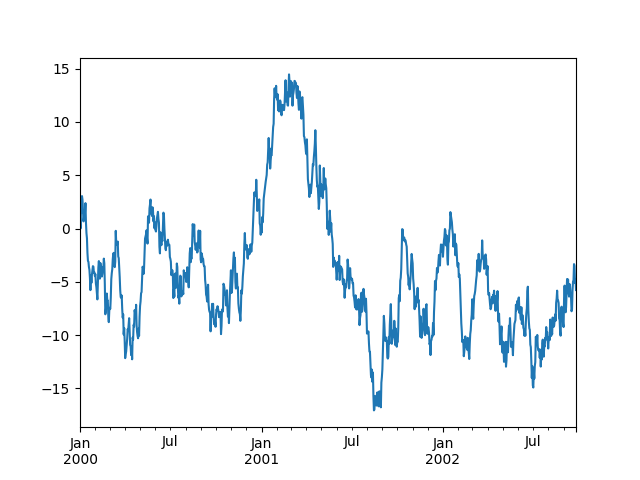

In [150]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，plot()能很方便地画出所有列及其标签

<IPython.core.display.Javascript object>


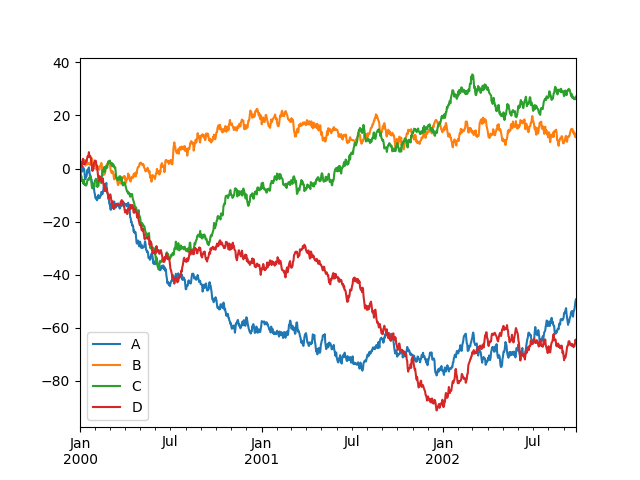

In [160]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); plt.legend(loc='best');